Import Library

In [24]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

Membaca Gambar

In [34]:
# Mengambil gambar dari web
img = imageio.imread("https://th.bing.com/th/id/OIP.aOKKFc5aMLXm5MxgujsxXgHaE9?pid=ImgDet&w=602&h=403&rs=1")

<ipython-input-34-2b7c62f1c8ce>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread("https://th.bing.com/th/id/OIP.aOKKFc5aMLXm5MxgujsxXgHaE9?pid=ImgDet&w=602&h=403&rs=1")


In [35]:
# Mengambil data dari gambar
img_height = img.shape[0]
img_width = img.shape[1]
img_channel = img.shape[2]

**Inversi**

Membuat variabel img_inversi

In [36]:
# embuat array img_inversi dengan dimensi yang sama seperti gambar asli (img) dan tipe data dtype yang ditentukan (unsigned 8-bit integer, np.uint8). 
# Array ini akan digunakan untuk menyimpan gambar hasil inversi.
img_inversi = np.zeros(img.shape, dtype=np.uint8)

Membuat fungsi untuk inversi grayscale

In [37]:
def inversi_grayscale(nilai):
    for y in range(0, img_height):  # Iterasi untuk setiap baris dalam gambar
        for x in range(0, img_width):  # Iterasi untuk setiap kolom dalam gambar
            red = img[y][x][0]  # Komponen warna merah piksel
            green = img[y][x][1]  # Komponen warna hijau piksel
            blue = img[y][x][2]  # Komponen warna biru piksel
            gray = (int(red) + int(green) + int(blue)) / 3  # Menghitung nilai keabuan (rata-rata dari komponen warna)
            gray = nilai - gray  # Melakukan inversi dengan mengurangi nilai keabuan dari nilai yang diberikan
            img_inversi[y][x] = (gray, gray, gray)  # Menyimpan nilai piksel yang telah diinversi dalam gambar hasil (img_inversi)

Membuat fungsi untuk inversi rgb

In [38]:
def inversi_rgb(nilai):
    for y in range(0, img_height):  # Iterasi untuk setiap baris dalam gambar
        for x in range(0, img_width):  # Iterasi untuk setiap kolom dalam gambar
            red = img[y][x][0]  # Komponen warna merah piksel
            red = nilai - red  # Melakukan inversi pada komponen warna merah dengan mengurangi nilainya dari `nilai` yang diberikan
            green = img[y][x][1]  # Komponen warna hijau piksel
            green = nilai - green  # Melakukan inversi pada komponen warna hijau dengan mengurangi nilainya dari `nilai` yang diberikan
            blue = img[y][x][2]  # Komponen warna biru piksel
            blue = nilai - blue  # Melakukan inversi pada komponen warna biru dengan mengurangi nilainya dari `nilai` yang diberikan
            img_inversi[y][x] = (red, green, blue)  # Menyimpan nilai piksel yang telah diinversi dalam gambar hasil (img_inversi)

Menampilkan hasil inversi

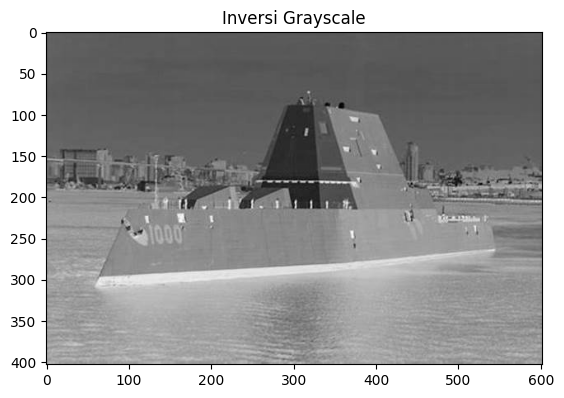

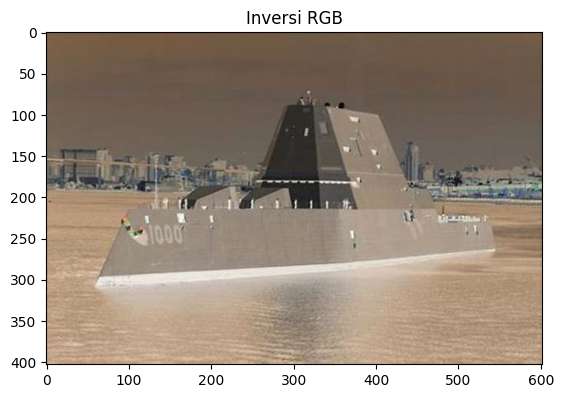

In [40]:
inversi_grayscale(255)  # Memanggil fungsi inversi_grayscale dengan nilai 255 sebagai parameter
plt.imshow(img_inversi)  # Menampilkan gambar hasil inversi grayscale menggunakan plt.imshow
plt.title("Inversi Grayscale")  # Menambahkan judul pada plot
plt.show()  # Menampilkan plot gambar inversi grayscale

inversi_rgb(255)  # Memanggil fungsi inversi_rgb dengan nilai 255 sebagai parameter
plt.imshow(img_inversi)  # Menampilkan gambar hasil inversi RGB menggunakan plt.imshow
plt.title("Inversi RGB")  # Menambahkan judul pada plot
plt.show()  # Menampilkan plot gambar inversi RGB

**Log**

Membuat variabel img_log untuk menampung hasil

In [42]:
# Membuat array img_log dengan dimensi yang sama dengan gambar img dan tipe data unsigned integer 8-bit. 
img_log = np.zeros(img.shape, dtype=np.uint8)

Mendefinisikan fungsi untuk log

In [43]:
def log(c):
    for y in range(0, img_height):
        for x in range(0, img_width):
            red = img[y][x][0]  # Mengambil nilai komponen merah dari piksel
            green = img[y][x][1]  # Mengambil nilai komponen hijau dari piksel
            blue = img[y][x][2]  # Mengambil nilai komponen biru dari piksel
            gray = (int(red) + int(green) + int(blue)) / 3  # Menghitung nilai rata-rata keabuan piksel
            gray = int(c * np.log(gray + 1))  # Menghitung logaritma dengan konstanta c dan mengubahnya menjadi bilangan bulat
            if gray > 255:  # Memastikan nilai keabuan tidak melebihi 255
                gray = 255
            if gray < 0:  # Memastikan nilai keabuan tidak kurang dari 0
                gray = 0
            img_log[y][x] = (gray, gray, gray)  # Menyimpan nilai keabuan pada array img_log

Menampilkan hasil log


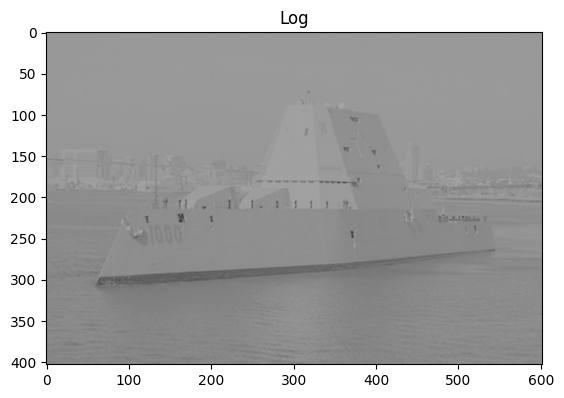

In [44]:
log(30)
plt.imshow(img_log)
plt.title("Log")
plt.show()

**Inversi & Log**


Membuat variabel img_inlog untuk menampung hasil


In [45]:
# bertujuan untuk membuat array img_inlog dengan dimensi yang sama dengan gambar img dan tipe data unsigned integer 8-bit (uint8).
img_inlog = np.zeros(img.shape, dtype=np.uint8)

Mendefinisikan fungsi untuk inversi log


In [46]:
def inlog(c):
    for y in range(0, img_height):
        for x in range(0, img_width):
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            gray = (int(red) + int(green) + int(blue)) / 3  # Menghitung nilai rata-rata keabuan
            gray = int(c * np.log(255 - gray + 1))  # Menghitung inversi logaritma dengan faktor penyesuaian c
            if gray > 255:
                gray = 255  # Memastikan nilai tidak melebihi 255
            if gray < 0:
                gray = 0  # Memastikan nilai tidak kurang dari 0
            img_inlog[y][x] = (gray, gray, gray)  # Menyimpan nilai ke dalam gambar hasil inversi logaritma

Menampilkan hasil inversi log

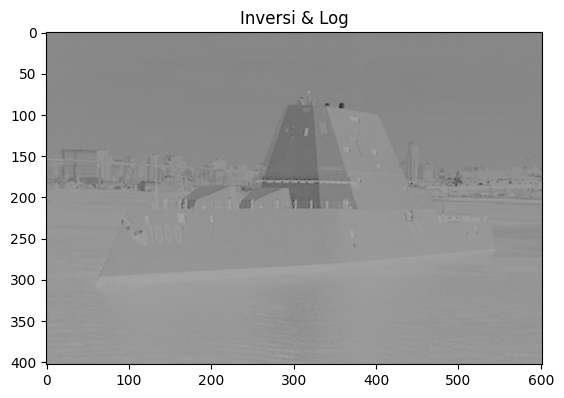

In [47]:
# melakukan inversi logaritma pada gambar.
inlog(30)
# Hasil dimunculkan dengan judul "Inversi & Log" dan ditampilkan menggunakan plt.show().
plt.imshow(img_inlog)
plt.title("Inversi & Log")
plt.show()

**Nth Power**

Membuat variabel img_nthpower untuk menampung hasil


In [48]:
img_nthpower = np.zeros(img.shape, dtype=np.uint8)

Mendefinisikan fungsi untuk nth power


In [50]:
def nthpower(c, y):
    # Konversi nilai c dan y menjadi pecahan dari 100
    thc = c / 100
    thy = y / 100
    
    # Iterasi untuk setiap piksel dalam gambar
    for y in range(0, img_height):
        for x in range(0, img_width):
            # Mendapatkan nilai komponen warna dari piksel
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            
            # Menghitung nilai keabuan rata-rata
            gray = (int(red) + int(green) + int(blue)) / 3
            
            # Menghitung nilai keabuan yang sudah diolah dengan pangkat
            gray = int(thc * pow(gray, thy))
            
            # Memastikan nilai keabuan berada dalam rentang 0-255
            if gray > 255:
                gray = 255
            if gray < 0:
                gray = 0
            
            # Memperbarui nilai piksel dalam gambar hasil
            img_nthpower[y][x] = (gray, gray, gray)

Menampilkan hasil


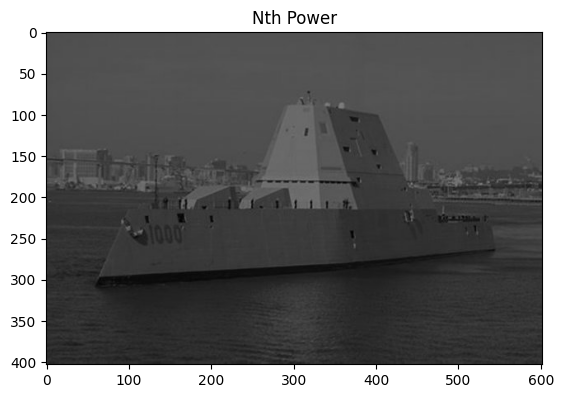

In [51]:
# mengaplikasikan fungsi nthpower dengan parameter c=50 dan y=100
nthpower(50, 100)

# menampilkan gambar hasil pengolahan pada img_nthpower
plt.imshow(img_nthpower)

# memberikan judul pada gambar
plt.title("Nth Power")

# menampilkan gambar
plt.show()

**Nth Root Power**


Membuat variabel img_nthrootpower


In [52]:
img_nthrootpower = np.zeros(img.shape, dtype=np.uint8)

Membuat fungsi untuk nth root power


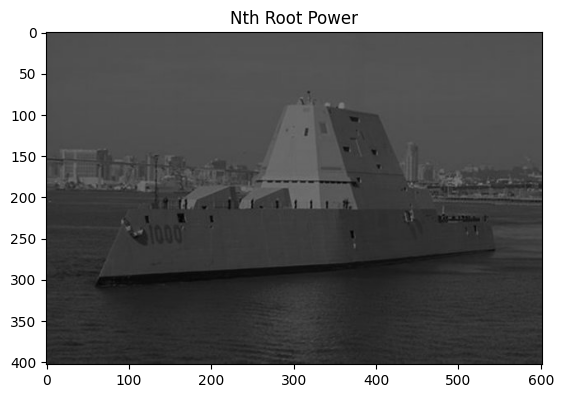

In [53]:
def nthrootpower(c, y):
    # Menghitung nilai thc dan thy
    thc = c / 100
    thy = y / 100
    
    # Melakukan pengolahan pada setiap piksel gambar
    for y in range(0, img_height):
        for x in range(0, img_width):
            red = img[y][x][0]
            green = img[y][x][1]
            blue = img[y][x][2]
            gray = (int(red) + int(green) + int(blue)) / 3            
            # Menghitung nilai gray menggunakan rumus nth root power
            gray = int(thc * pow(gray, 1./thy))            
            # Memastikan nilai gray berada dalam rentang 0-255
            if gray > 255:
                gray = 255
            if gray < 0:
                gray = 0
            # Menyimpan nilai gray pada img_nthpower
            img_nthpower[y][x] = (gray, gray, gray)
            # Mengaplikasikan fungsi nthrootpower dengan parameter c=50 dan y=100

nthrootpower(50, 100)
# Menampilkan gambar hasil pengolahan pada img_nthpower
plt.imshow(img_nthpower)
# Memberikan judul pada gambar
plt.title("Nth Root Power")
# Menampilkan gambar
plt.show()

Menampilkan hasil


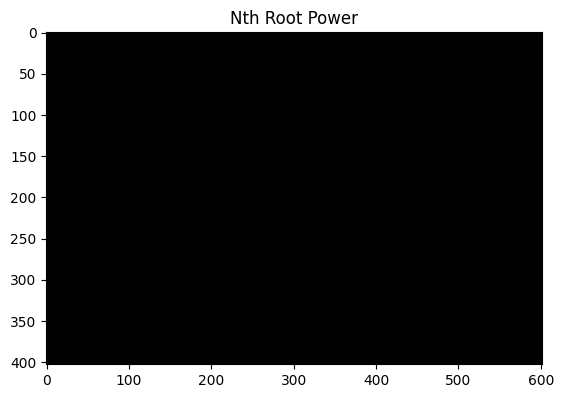

In [54]:
# memanggil fungsi nthrootpower dengan parameter c=50 dan y=100. Fungsi tersebut melakukan pengolahan gambar dengan metode Nth Root Power.
nthrootpower(50, 100)
plt.imshow(img_nthrootpower)
plt.title("Nth Root Power")
plt.show()